In [24]:
! pip install qeds
import pandas as pd
%matplotlib inline
import qeds
qeds.themes.mpl_style();

# Introduction - Exercises



**For the purpose of these exercises, we create:**

- **a Series which contains the US unemployment rate every other year starting in 1995**

- **a DataFrame that contains the unemployment rate every other year by region of the US starting in 1995**

In [25]:
#Series which contains the US unemployment rate every other year starting in 1995
values = [5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8., 5.7]
years = list(range(1995, 2017, 2))

unemp = pd.Series(data=values, index=years, name="Unemployment")
unemp

1995    5.6
1997    5.3
1999    4.3
2001    4.2
2003    5.8
2005    5.3
2007    4.6
2009    7.8
2011    9.1
2013    8.0
2015    5.7
Name: Unemployment, dtype: float64

In [26]:
#DataFrame that contains the unemployment rate every other year by region of the US starting in 1995
data = {
    "NorthEast": [5.9,  5.6,  4.4,  3.8,  5.8,  4.9,  4.3,  7.1,  8.3,  7.9,  5.7],
    "MidWest": [4.5,  4.3,  3.6,  4. ,  5.7,  5.7,  4.9,  8.1,  8.7,  7.4,  5.1],
    "South": [5.3,  5.2,  4.2,  4. ,  5.7,  5.2,  4.3,  7.6,  9.1,  7.4,  5.5],
    "West": [6.6, 6., 5.2, 4.6, 6.5, 5.5, 4.5, 8.6, 10.7, 8.5, 6.1],
    "National": [5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8., 5.7]
}

unemp_region = pd.DataFrame(data, index=years)
unemp_region

,NorthEast,MidWest,South,West,National
1995,5.9,4.5,5.3,6.6,5.6
1997,5.6,4.3,5.2,6.0,5.3
1999,4.4,3.6,4.2,5.2,4.3
2001,3.8,4.0,4.0,4.6,4.2
2003,5.8,5.7,5.7,6.5,5.8
2005,4.9,5.7,5.2,5.5,5.3
2007,4.3,4.9,4.3,4.5,4.6
2009,7.1,8.1,7.6,8.6,7.8
2011,8.3,8.7,9.1,10.7,9.1
2013,7.9,7.4,7.4,8.5,8.0


## Exercise 1


1. **Display only the first 2 elements of the Series using the `.head` method.**

In [27]:
# To display only the two first lines, we use the .head function with "2" as an argument.
unemp.head(2)

1995    5.6
1997    5.3
Name: Unemployment, dtype: float64

2. **Using the `plot` method, make a bar plot.**  

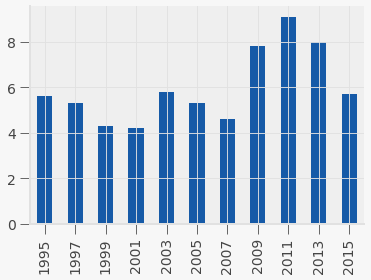

In [28]:
# The following makes a bar for each state and for each year.
unemp.plot.bar()
# Note that, by default, the index is taken as the x variable here.

3. **Use `.loc` to select the lowest/highest unemployment rate shown in the Series.**  

In [29]:
#lowest temperature
unemp.loc[unemp.idxmin()]

4.2

In [30]:
#highest temperature
unemp.loc[unemp.idxmax()]

9.1

4. **Run the code `unemp.dtype` below. What does it give you? Where do you think it comes from?**

In [31]:
unemp.dtype
#we get that the dtype is float64
#this tells us the type of data stored in the series 

dtype('float64')

## Exercise 2

**Now we create we create a DataFrame that contains the unemployment rate every other year by region of the US starting in 1995.**

1. **Use introspection (or google-fu) to find a way to obtain a list with all of the column names in `unemp_region`.**

In [32]:
list(unemp_region)

#to get the index, we can do:
#list(unemp_region.index)

['NorthEast', 'MidWest', 'South', 'West', 'National']

2. **Using the `plot` method, make a bar plot. What does it look like now?**  

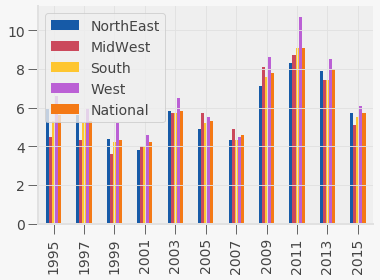

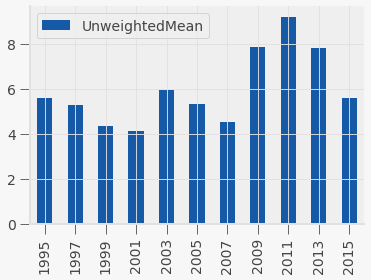

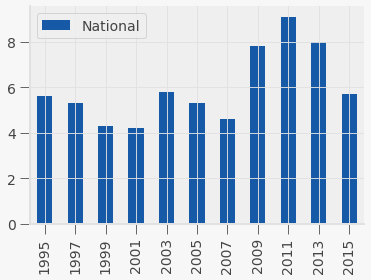

In [33]:
# Note that, by default, the index is taken as the x variable here.
unemp_region.plot.bar()

#We create a column entitled UnweightedMean to play around with other plotting characteristics
unemp_region["UnweightedMean"] = (unemp_region["NorthEast"] +
                                  unemp_region["MidWest"] +
                                  unemp_region["South"] +
                                  unemp_region["West"])/4

# The following makes a bar for each year, and this bar is the unweighted mean
unemp_region.plot.bar(y='UnweightedMean')
# The following makes a bar for each year, but plots the value "Nation"
unemp_region.plot.bar(y='National')

3. **Use `.loc` to select the the unemployment data for the `NorthEast` and `West` for the years 1995, 2005, 2011, and 2015.**  

In [34]:
# .loc "accesses a group of rows and columns by label(s)..." Arguments are labels
unemp_region.loc[[1995, 2005, 2011, 2015], ["NorthEast", "West"]]

,NorthEast,West
1995,5.9,6.6
2005,4.9,5.5
2011,8.3,10.7
2015,5.7,6.1


4. **Run the code `unemp_region.dtypes` below. What does it give you? How does this compare with `unemp.dtype`?**

In [35]:
unemp_region.dtypes

NorthEast         float64
MidWest           float64
South             float64
West              float64
National          float64
UnweightedMean    float64
dtype: object